
Options:
1. Interest Over Time
2. Interest By Region
3. Top Charts
4. Trending Searches
5. Exit


Enter your choice (1-5):  1
Enter keyword(s) (comma-separated):  AI


You selected: Interest Over Time
Interest Over Time Data:
            AI  isPartial
date                     
2023-12-17  59      False
2023-12-24  55      False
2023-12-31  58      False
2024-01-07  62      False
2024-01-14  69      False
2024-01-21  66      False
2024-01-28  67      False
2024-02-04  62      False
2024-02-11  68      False
2024-02-18  74      False


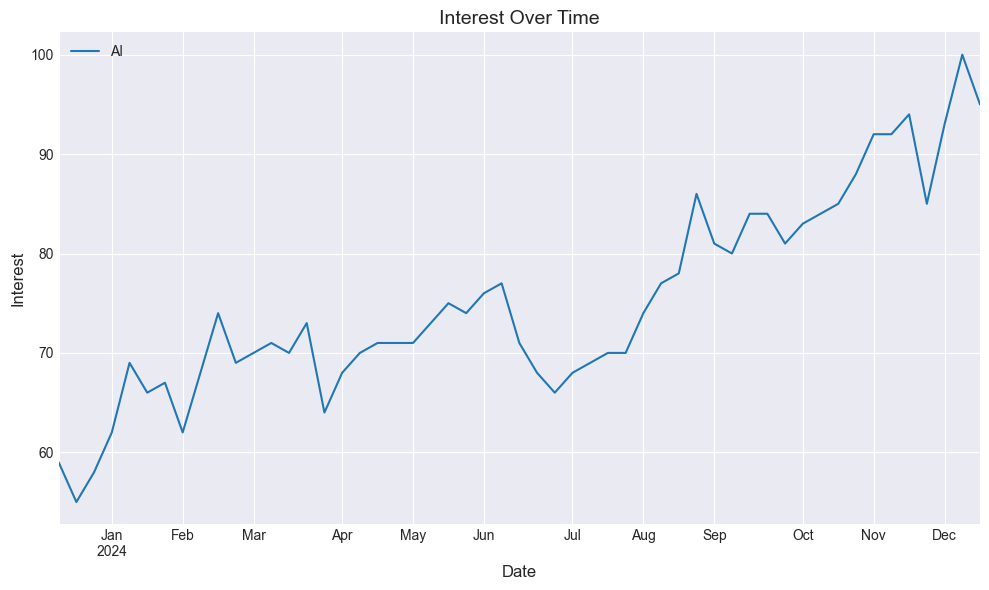


Options:
1. Interest Over Time
2. Interest By Region
3. Top Charts
4. Trending Searches
5. Exit


Enter your choice (1-5):  2
Enter keyword(s) (comma-separated):  AI


You selected: Interest By Region
Interest by Region Data:
                   AI
geoName              
Afghanistan         0
Albania             0
Algeria            27
American Samoa      0
Andorra             0
Angola              0
Anguilla            0
Antarctica          0
Antigua & Barbuda   0
Argentina          16


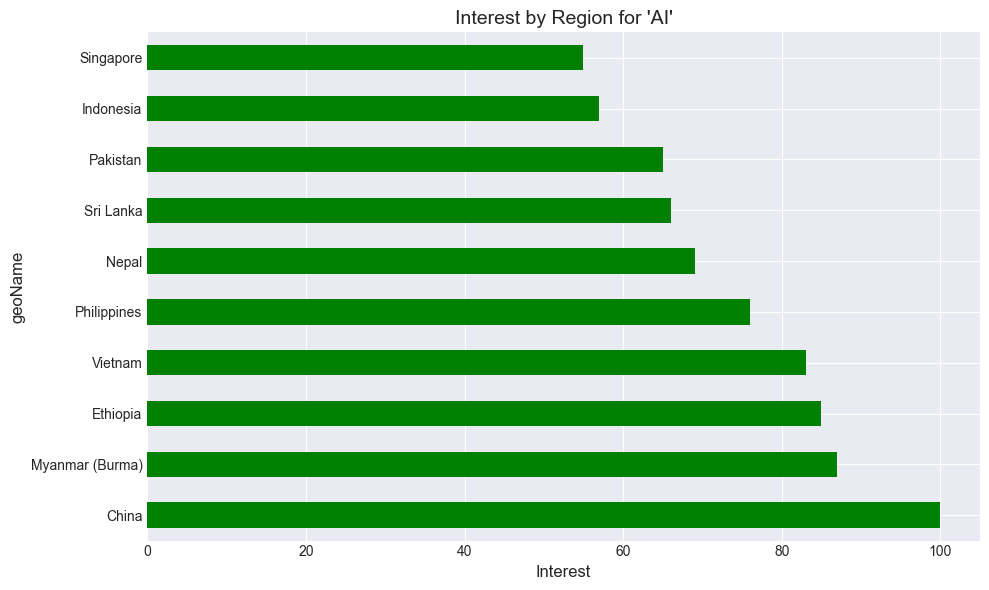


Options:
1. Interest Over Time
2. Interest By Region
3. Top Charts
4. Trending Searches
5. Exit


Enter your choice (1-5):  3


You selected: Top Charts
Top Charts Data:
                    title   exploreQuery
0  War in Israel and Gaza    Israel Gaza
1       Titanic submarine               
2       Turkey earthquake               
3        Hurricane Hilary               
4        Hurricane Idalia               
5           Hurricane Lee               
6          Maine shooting               
7      Nashville shooting               
8           Chandrayaan-3  Chandrayaan 3
9            War in Sudan          Sudan

Options:
1. Interest Over Time
2. Interest By Region
3. Top Charts
4. Trending Searches
5. Exit


Enter your choice (1-5):  4


You selected: Trending Searches
Trending Searches:
                           0
0                Janis Timma
1                    Vanuatu
2  Wisconsin school shooting
3                    Vikings
4         Falcons vs Raiders
5           Justin Jefferson
6                   Patriots
7        Philadelphia Eagles
8                   SoftBank
9                    Nuggets

Options:
1. Interest Over Time
2. Interest By Region
3. Top Charts
4. Trending Searches
5. Exit


Enter your choice (1-5):  5


Exiting. Goodbye!


In [10]:
#### import sys
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import time
import random
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Global Plot Settings for Better Readability
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10
})

# Initialize Pytrends
Trending_topics = TrendReq(hl='en-US', tz=360)

# Retry Logic for API Requests
def add_delay():
    delay = random.randint(5, 15)
    print(f"Retrying in {delay} seconds...")
    time.sleep(delay)

def try_request(func, *args, **kwargs):
    retries = 3
    for attempt in range(retries):
        try:
            return func(*args, **kwargs)
        except Exception as e:
            if attempt < retries - 1:
                add_delay()
            else:
                print("Max retries reached. Moving to the next operation.")
    return None

# Choice 1: Interest Over Time
def choice_1(kw_list):
    print("You selected: Interest Over Time")
    try:
        Trending_topics.build_payload(kw_list, cat=0, timeframe='today 12-m')
        data = try_request(Trending_topics.interest_over_time)
        
        if data is not None and not data.empty:
            print("Interest Over Time Data:")
            print(data.head(10))
            for kw in kw_list:
                if kw in data.columns:
                    data[kw].plot(label=kw)
            plt.title("Interest Over Time")
            plt.ylabel("Interest")
            plt.xlabel("Date")
            plt.legend()
            plt.tight_layout()
            plt.show()
        else:
            print("No data available. Please try a different keyword.")
    except Exception as e:
        print(f"Error in choice_1: {e}")

# Choice 2: Interest By Region
def choice_2(kw_list):
    print("You selected: Interest By Region")
    try:
        Trending_topics.build_payload(kw_list, cat=0, timeframe='today 12-m')
        data = try_request(Trending_topics.interest_by_region)
        if data is not None and not data.empty:
            print("Interest by Region Data:")
            print(data.head(10))
            for kw in kw_list:
                if kw in data.columns:
                    data[kw].nlargest(10).plot(kind='barh', title=f"Interest by Region for '{kw}'", color='green')
                    plt.xlabel("Interest")
                    plt.tight_layout()
                    plt.show()
        else:
            print("No regional data available.")
    except Exception as e:
        print(f"Error in choice_2: {e}")

# Choice 3: Top Charts
def choice_3():
    print("You selected: Top Charts")
    try:
        data = try_request(Trending_topics.top_charts, 2023, hl='en-US', tz=300, geo='GLOBAL')
        if data is not None:
            print("Top Charts Data:")
            print(data.head(10))
        else:
            print("No Top Charts data available.")
    except Exception as e:
        print(f"Error in choice_3: {e}")

# Choice 4: Trending Searches
def choice_4():
    print("You selected: Trending Searches")
    try:
        data = try_request(Trending_topics.trending_searches, pn='united_states')
        if data is not None:
            print("Trending Searches:")
            print(data.head(10))
        else:
            print("No trending searches data available.")
    except Exception as e:
        print(f"Error in choice_5: {e}")

# Main Menu
def main():
    while True:
        print("\nOptions:")
        print("1. Interest Over Time")
        print("2. Interest By Region")
        print("3. Top Charts")
        print("4. Trending Searches")
        print("5. Exit")

        choice = input("Enter your choice (1-5): ").strip()
        if choice not in {'1', '2', '3', '4', '5'}:
            print("Invalid choice. Please enter a number between 1 and 5.")
            continue

        if choice in {'1', '2'}:
            kw_input = input("Enter keyword(s) (comma-separated): ").strip()
            kw_list = [kw.strip() for kw in kw_input.split(",") if kw.strip()]
            if not kw_list:
                print("No keywords entered. Please try again.")
                continue

        match choice:
            case '1': choice_1(kw_list)
            case '2': choice_2(kw_list)
            case '3': choice_3()
            case '4': choice_4()
            case '5':
                print("Exiting. Goodbye!")
                break  # Exit gracefully

if __name__ == "__main__":
    main()
